# OKCupid Portfolio Project 
## Scope ##

This project analyzes data from on-line dating application OKCupid and based on available data will try to resolve particular problem. 

## Goal ##

Primary goal of this project is to scope, prepare, analyze data, and to create machine learning model which would help particular question to be answered . To do those activities, I’ll be using file profiles.csv provided by Codeacademy.com and apply  Data Analysis and Machine Learning skills  learned  through their Data Scientist career path. Project will have 3 parts: 

- Exploring OKCupid Data
- Classification of OKCupid portal user as either religious or non-religious person
- Trying to predict the religion of the user

Praying to God alone is unlikely to change the fortunes of somebody’s  love life , but sense of purpose, common mission, values and rituals embedded in various religions can play a role at least when deciding whether to approach another person or not.  
Therefore, assumption for further analysis is that religion is relevant in modern romantic life . File provided in the project contains religion information, and I’ll use it to answer religion related questions.
In that regard, key questions which project would like to answer on basis of available data are following: 

- Is it possible to predict if person is religious ?
- Is it possible to predict the religion of the person ? 



### Import of Libraries ###

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
users = pd.read_csv('profiles.csv')
print('Size of file : ' + str(len(users)) + ' entries')

Size of file : 59946 entries


### Analyzing Data Types ###

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

File has 59946 entries, from 31, only  3 columns are numeric 

In [4]:
zero = users.isnull().sum().reset_index()
descriptions = ['age of user', 'body type of user', 'dietary information', 'alcohol consumption', 'drug usage', 'educational attainment', 'My self summary','What I’m doing with my life','I’m really good at','The first thing people usually notice about me','Favorite books, movies, show, music, and food', 'The six things I could never do without','I spend a lot of time thinking about', 'On a typical Friday night I am', 'The most private thing I am willing to admit','You should message me if…','ethnic backgrounds','height of user','income of user', 'employment description','last login','user locations','children status','sexual orientation','pet preferences','religious background', 'gender', 'astrological symbol','smoking consumption','language spoken','relationship status']
data = {'Features': users.columns, 'Zero_Values': zero[0], 'Colum_Description': descriptions}
df =pd.DataFrame(data)
df


,Features,Zero_Values,Colum_Description
0,age,0,age of user
1,body_type,5296,body type of user
2,diet,24395,dietary information
3,drinks,2985,alcohol consumption
4,drugs,14080,drug usage
5,education,6628,educational attainment
6,essay0,5488,My self summary
7,essay1,7572,What I’m doing with my life
8,essay2,9638,I’m really good at
9,essay3,11476,The first thing people usually notice about me


Table contains column names, how many entries are missing per column and column description . What I can see from here is that:
- Interestingly, income entries are fully available
- Data contains essays of the users, which could be great source for answering project questions by applying NLP and Naive Bayes classifier
-  First thoughts on  features which could be useful to predict the religion and religion status:  of users: diet, columns desribing vices (drinks, drugs, smokes), age, height,education, ethnicity, job, status 

**Analysis of quantitative variables**

Let's check the income column

In [5]:
users.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

It turns out, majority of users don't provide their earnings. Which I find appropriate since this shouldn't be a criteria to choose a partner. Below are min, max values of remaining numeric data  

In [6]:
print('Minimum age in data set {}'.format(users.age.min()))
print('Maximum age in data set {}'.format(users.age.max()))
print('Minimum height in data set {}'.format(users.height.min()))
print('Maximum height in data set {}'.format(users.height.max()))

Minimum age in data set 18
Maximum age in data set 110
Minimum height in data set 1.0
Maximum height in data set 95.0


In [7]:
print(len(users[users['height']<50]))

27


**Outliers** 


There are 27 users who are having height less than 50 inches (127cm). As per [Wikipedia](https://en.wikipedia.org/wiki/Dwarfism#:~:text=Dwarfism%20occurs%20when%20an%20organism,with%20dwarfism%20are%20slightly%20taller.,average) height of person having dwarfism is  122 centimetres (4 ft 0 in), although some individuals with dwarfism are slightly taller. 
Therefore, I will remove users with:
- hight below 120 inches, 
- users taller than 80 inches (203 cm) and 
- users who are older than 85 years   

In [8]:
# clean up the outliers 
users = users[(users['age']<85) & (users['height']<80) & (users['height']>50)]
users.shape

(59808, 31)

**Distribution of Age and Height after removing extreme values**

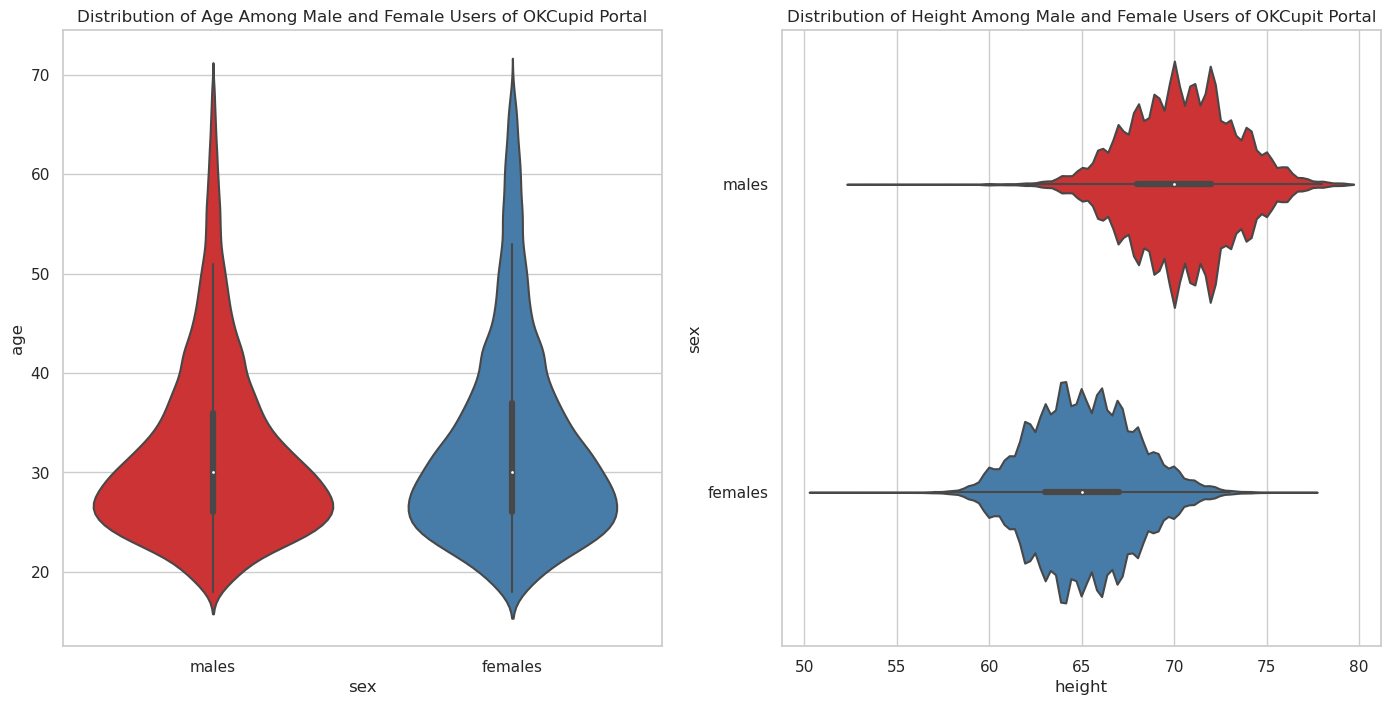

In [9]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(1, 2, figsize=(17,8))
labels = ['males', 'females']
ax[0] = sns.violinplot(ax = ax[0], y = 'age', x='sex', data=users, palette='Set1')
ax[1] = sns.violinplot(ax = ax[1], x = 'height', y= 'sex',data=users, palette='Set1')
ax[0].set_title("Distribution of Age Among Male and Female Users of OKCupid Portal")
ax[1].set_title("Distribution of Height Among Male and Female Users of OKCupit Portal")
ax[0].set_xticks(range(2))
ax[0].set_xticklabels(labels)
ax[1].set_yticks(range(2))
ax[1].set_yticklabels(labels)
plt.show()

#fig.set_yticks(range(11))
#fig.set_yticklabels(labels)


In [10]:
averages = users.groupby('sex').age.mean()
print("average age of portal users is: ")
print(averages)
print('median:' + str(users.age.median()))

average age of portal users is: 
sex
f    32.819125
m    32.022876
Name: age, dtype: float64
median:30.0


- Average Age of Users is approximimately the same between sexes, 32 years. After calculating it, it is clear that average is slightly higher for females
- Distribution is right skewed, meaning that there are more users with age of less than the average
- Median Value is around 30 which is also clearly visible by white dot in the violin plot
- Median value for height is aroung 65 inches for women and around 70 inches for men



**Distribution of Height among males and females using histogram**
Height Distribution with violinplot was not that clear 

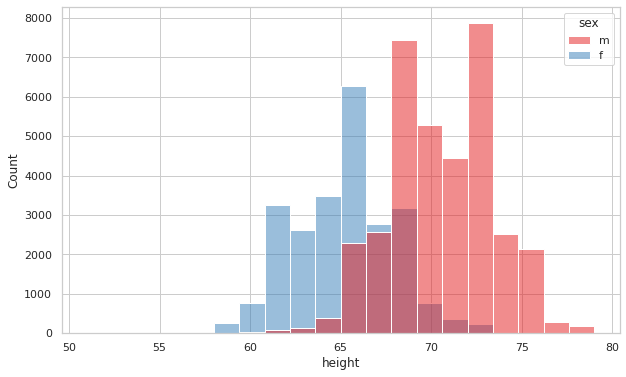

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data = users, x='height', bins = 20, hue='sex', palette='Set1')


plt.show()

## Cleaning up and Examination of  Categorical Variables ##

**Education distribution differentiated by sex**

In [11]:
users.education.value_counts()

graduated from college/university    23926
graduated from masters program        8952
working on college/university         5700
working on masters program            1682
graduated from two-year college       1529
graduated from high school            1418
graduated from ph.d program           1268
graduated from law school             1120
working on two-year college           1069
dropped out of college/university      994
working on ph.d program                981
college/university                     797
graduated from space camp              652
dropped out of space camp              517
graduated from med school              446
working on space camp                  442
working on law school                  268
two-year college                       221
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        134
dropped out of ph.d program            125
dropped out

There are different statuses for each type of attained education. In this project users who were dropped out or still styding particular school will be considered as they have achieved the particular grade.  

**Cleaning up the education data**

In [12]:
users['education_clean'] =users.education.str.split().str[-2:].str.join(' ')


In [13]:
users.education_clean.value_counts()

from college/university    23926
masters program            10908
on college/university       5700
two-year college            3010
ph.d program                2400
high school                 1701
space camp                  1667
law school                  1424
of college/university        994
college/university           797
med school                   681
Name: education_clean, dtype: int64

In [14]:
e = {'from college/university': 'college/university', 'masters program': 'masters program', 'on college/university': 'college/university', 'two-year college': 'two-year college', 'ph.d program': 'ph.d program', 'high school':'high school', 'space camp': 'space camp', 'law school': 'law school', 'of college/university': 'college/university', 'college/university':'college/university', 'med school': 'med school'}

users['education_final'] = users['education_clean'].map(e)
users.education_final.value_counts()

college/university    31417
masters program       10908
two-year college       3010
ph.d program           2400
high school            1701
space camp             1667
law school             1424
med school              681
Name: education_final, dtype: int64

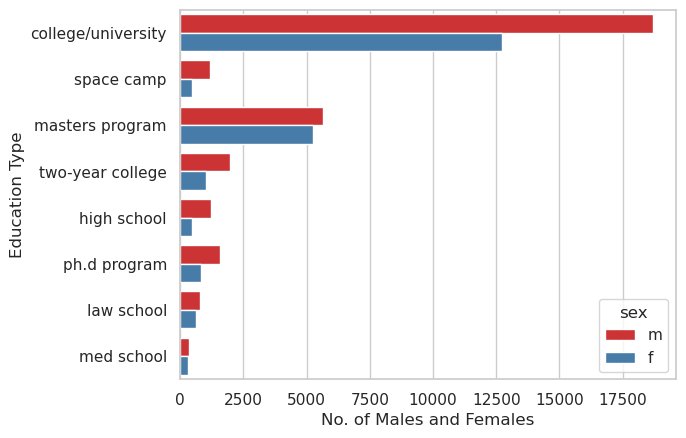

In [15]:
sns.countplot(data = users, y = 'education_final', hue='sex', palette='Set1')
plt.xlabel('No. of Males and Females')
plt.ylabel('Education Type')
plt.show()

There are in general less females than males for each education level. The difference seems to be significant for college/university, two-year colleage and ph.d program in favor of men. 
Like I mentioned above we wont be analysing if they are still styding or if they are dropped out .

**Check education distribution differentiated by religion**

Cleaning up the religion data first

In [16]:
users.religion.value_counts()

agnosticism                                   2721
other                                         2688
agnosticism but not too serious about it      2633
agnosticism and laughing about it             2489
catholicism but not too serious about it      2316
atheism                                       2172
other and laughing about it                   2110
atheism and laughing about it                 2066
christianity                                  1950
christianity but not too serious about it     1947
other but not too serious about it            1549
judaism but not too serious about it          1516
atheism but not too serious about it          1318
catholicism                                   1062
christianity and somewhat serious about it     926
atheism and somewhat serious about it          846
other and somewhat serious about it            843
catholicism and laughing about it              726
judaism and laughing about it                  679
buddhism but not too serious ab

First we'll clean up the religion column. I won't be considering info on seriousness of belief users gave about specific religion group they belong to.  

In [17]:
users['religion_clean'] = users.religion.str.split().str[0]

In [18]:
users.religion_clean.value_counts()

agnosticism     8796
other           7717
atheism         6971
christianity    5770
catholicism     4754
judaism         3094
buddhism        1945
hinduism         449
islam            135
Name: religion_clean, dtype: int64

In [19]:
users['religion_clean'].replace({'agnosticism':'atheism', 'catholicism': 'christianity'}, inplace=True)
users.religion_clean.value_counts()

atheism         15767
christianity    10524
other            7717
judaism          3094
buddhism         1945
hinduism          449
islam             135
Name: religion_clean, dtype: int64

**Education Structure among Different Religios Groups**  

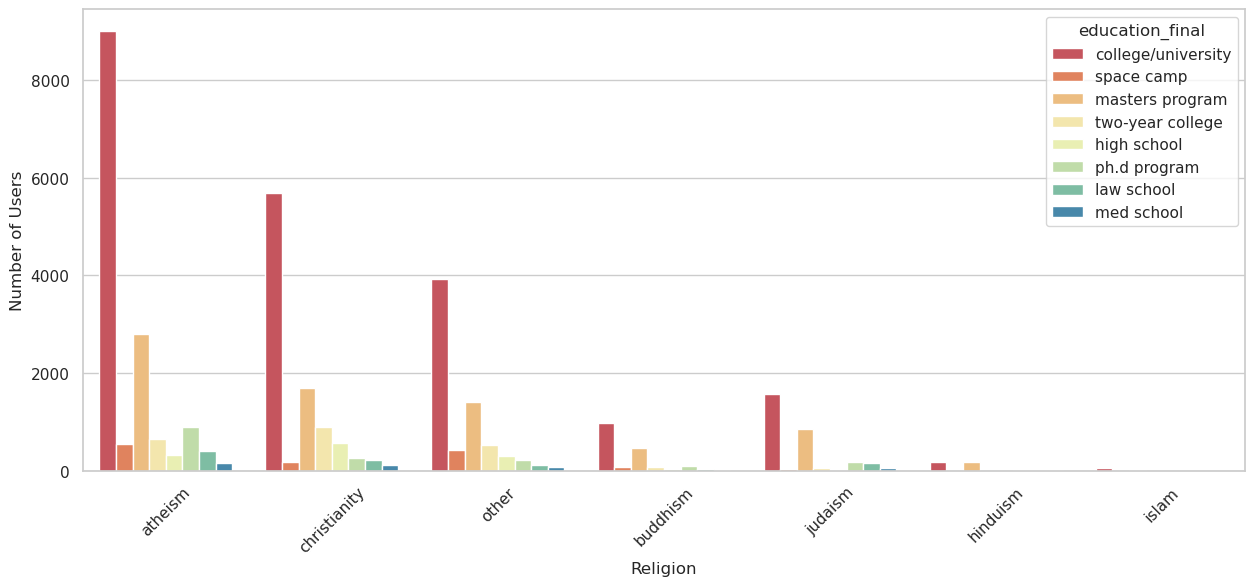

In [20]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(data=users, x='religion_clean', hue='education_final', palette='Spectral')
plt.xticks(rotation=45)
plt.xlabel('Religion')
plt.ylabel('Number of Users')
plt.show()

In each religious group the biggest portion of users has attended college/university. Second biggest share of users have been attended master programs. There is not much users with Ph.d. 

**Sexual Orientation among different Religios Groups**

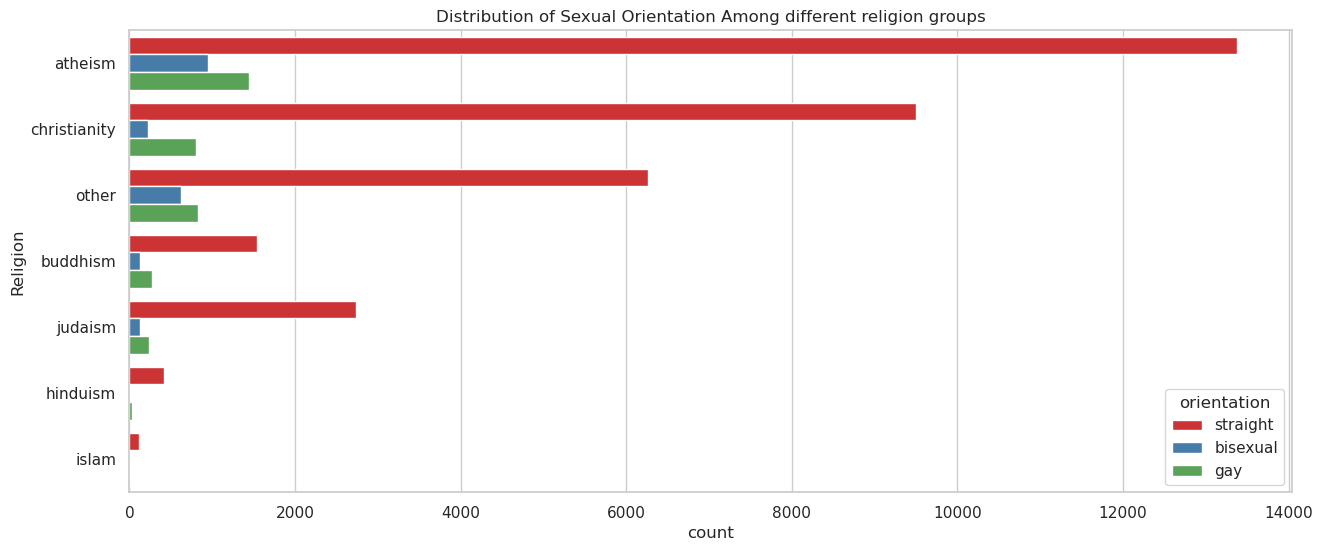

In [21]:
sns.set(style='whitegrid')
f, ax=plt.subplots(figsize=(15,6))
ax = sns.countplot(data=users, y = 'religion_clean', hue='orientation', palette='Set1')
ax.set_title('Distribution of Sexual Orientation Among different religion groups')
plt.ylabel('Religion')
plt.show()

Biggest number of users in all religion groups are straight. the least number of users are bixesual , at least as per available data.  From the user of islam, there are only straight users 

**Who is more prone to vices**

In [23]:
vice = users[['sex', 'education_final', 'smokes', 'drugs', 'drinks', 'religion_clean']]

<Figure size 640x480 with 0 Axes>

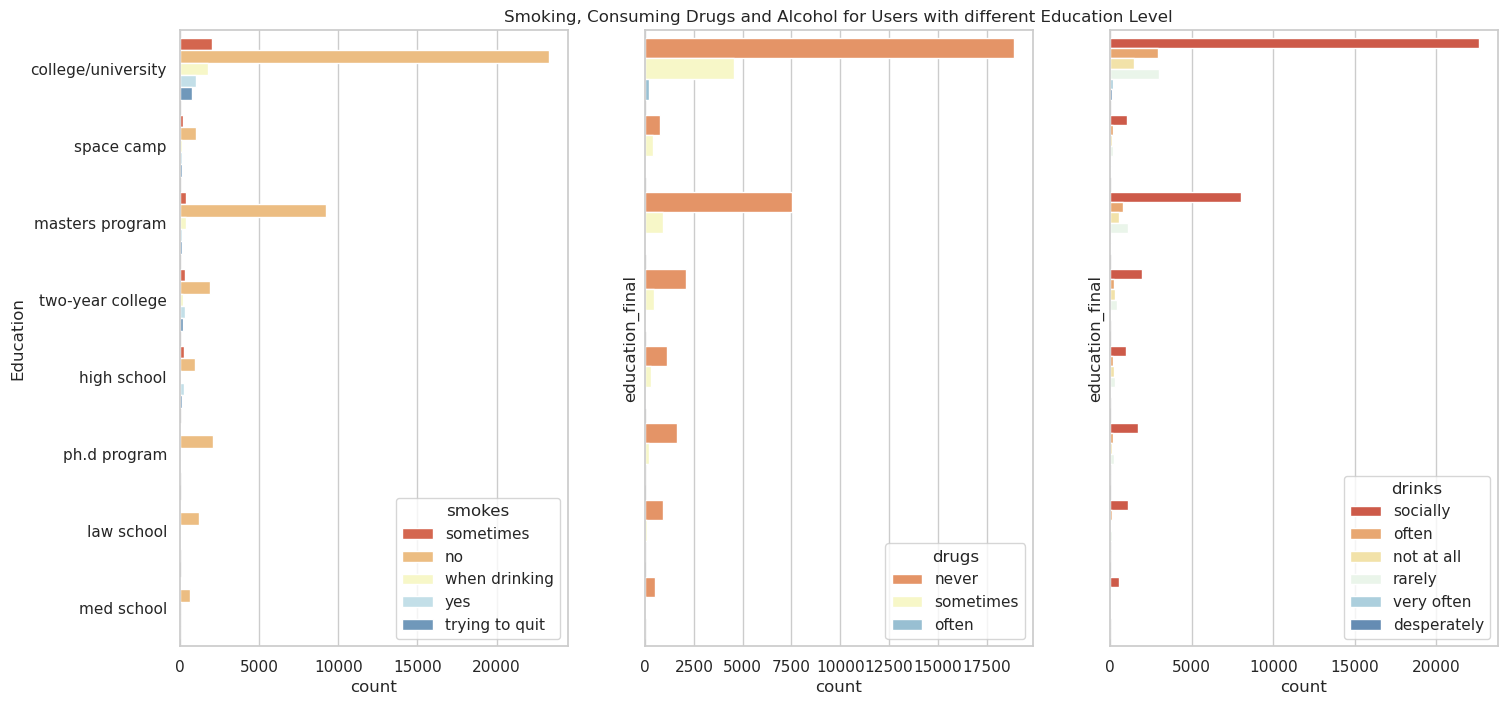

In [25]:
plt.clf()
fig,ax = plt.subplots(1,3, figsize = (17,8), sharey=True)
ax[0] = sns.countplot(ax = ax[0], data = vice, y = vice['education_final'], hue = 'smokes', palette = 'RdYlBu')
ax[1] = sns.countplot(ax = ax[1], data= vice, y=vice['education_final'], hue='drugs', palette = 'RdYlBu')
ax[2] = sns.countplot(ax = ax[2], data= vice, y = vice['education_final'], hue = 'drinks', palette = 'RdYlBu')
ax[0].set_ylabel('Education')
ax[1].set_title("Smoking, Consuming Drugs and Alcohol for Users with different Education Level")
plt.show()

- Users visiting colleague seems to be most prone to vices as per available data
- When we check alcohol consumption, almoust all eduction groups drink when sociallising 

<Figure size 640x480 with 0 Axes>

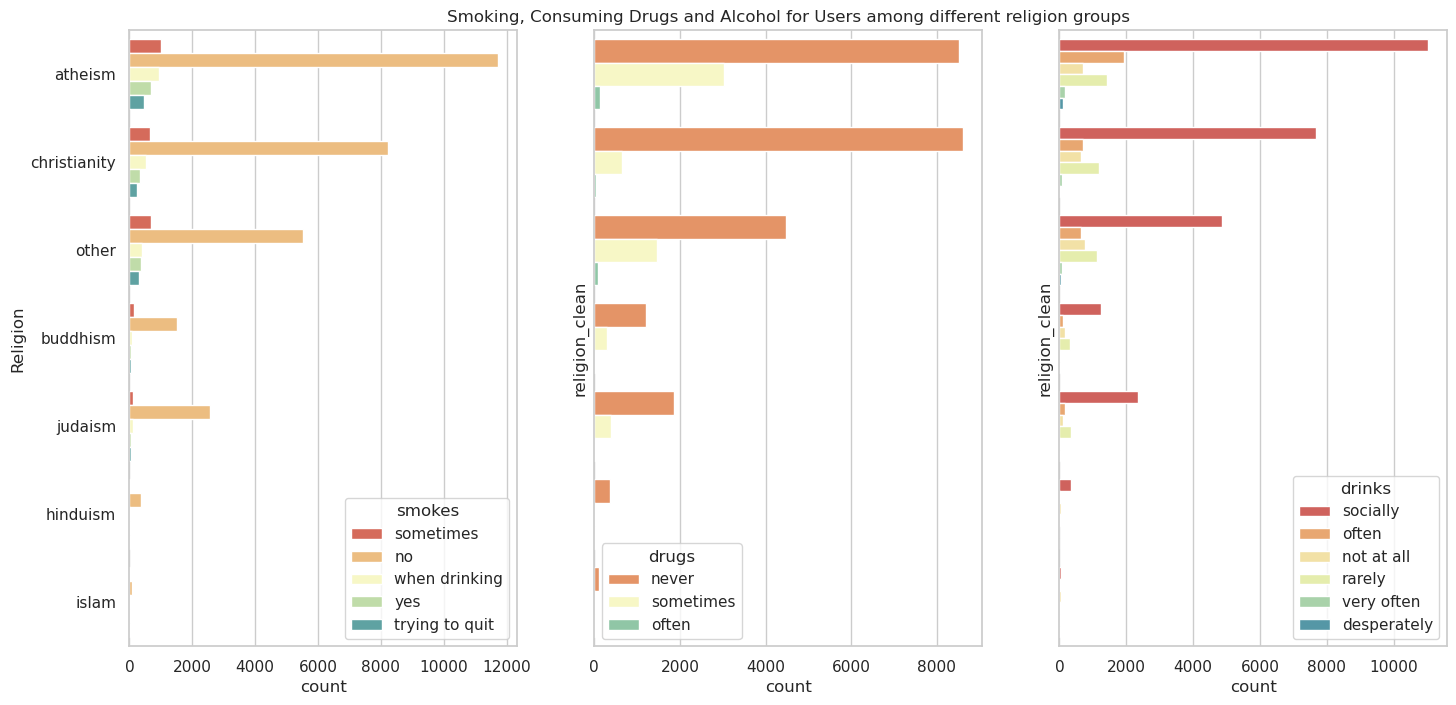

In [26]:
plt.clf()
sns.set(style = "whitegrid")
fig,ax = plt.subplots(1,3, figsize = (17,8), sharey=True)
ax[0] = sns.countplot(ax = ax[0], data = vice, y = vice['religion_clean'], hue = 'smokes', palette='Spectral')
ax[1] = sns.countplot(ax = ax[1], data= vice, y=vice['religion_clean'], hue='drugs', palette = 'Spectral')
ax[2] = sns.countplot(ax = ax[2], data= vice, y = vice['religion_clean'], hue = 'drinks', palette='Spectral')
ax[0].set_ylabel('Religion')
ax[1].set_title("Smoking, Consuming Drugs and Alcohol for Users among different religion groups")
plt.show()

- When we check the religious groups , evident is same trend: All religious groups drink alcohol only when sociallising

In [26]:
users.job.value_counts()

other                                7572
student                              4865
science / tech / engineering         4842
computer / hardware / software       4697
artistic / musical / writer          4428
sales / marketing / biz dev          4389
medicine / health                    3678
education / academia                 3509
executive / management               2368
banking / financial / real estate    2264
entertainment / media                2240
law / legal services                 1379
hospitality / travel                 1362
construction / craftsmanship         1019
clerical / administrative             805
political / government                705
rather not say                        432
transportation                        365
unemployed                            272
retired                               249
military                              200
Name: job, dtype: int64

**Gender Structure for each Religios Group**

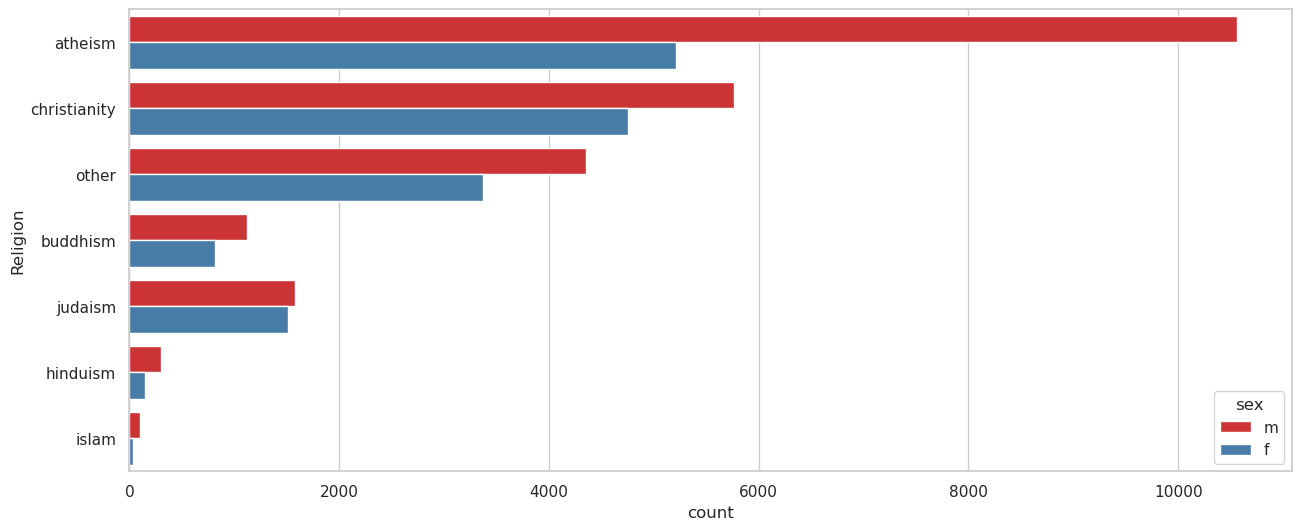

In [27]:
f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(data = users, y = 'religion_clean', hue = 'sex', palette='Set1')
plt.ylabel('Religion')
plt.show()

In all groups, there are more males than females

**Check the Missing Values and Define Features for Machine Learning Model**

In [28]:
users['education_final']= users['education_final'].fillna('unknown')
users.education_final.value_counts()

college/university    31417
masters program       10908
unknown                6600
two-year college       3010
ph.d program           2400
high school            1701
space camp             1667
law school             1424
med school              681
Name: education_final, dtype: int64

In [29]:
users.education_final.isnull().sum()

0

**Cleaning Diet Column**

In [30]:
users.diet.value_counts()

mostly anything        16553
anything                6174
strictly anything       5096
mostly vegetarian       3441
mostly other            1002
strictly vegetarian      874
vegetarian               665
strictly other           447
mostly vegan             338
other                    330
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              47
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

In [31]:
users['diet'] = users.diet.fillna('unknown')
users['diet_clean'] = users['diet'].str.split().str[-1]

In [32]:
users.diet_clean.value_counts()

anything      27823
unknown       24333
vegetarian     4980
other          1779
vegan           702
kosher          115
halal            76
Name: diet_clean, dtype: int64

**Cleaning Ethnicity Data**

There are over 200 unique entries for ethnicity, majority of of them contain several ones. To categorize it somehow, I labeled the unique ones, and for entries containing several ethnicities I labeled them as 'multiethnic' 

In [33]:
ethnicity_map = {'asian': 'asian', 'white':'white', 'black':'black', 'hispanic / latin': 'latin', 'native american': 'native american', 'other':'other', 'pacific islander':'pacific islander', 'middle eastern': 'middle eastern', 'indian': 'indian', 'unknown':'unknown'}
users['ethnicity'] = users.ethnicity.fillna('unknown')
users['ethnicity_clean'] = users.ethnicity.map(ethnicity_map).fillna('multiethnic')


In [34]:

e = users.ethnicity_clean.value_counts()
e

white               32778
multiethnic          6837
asian                6130
unknown              5651
latin                2815
black                2002
other                1695
indian               1077
pacific islander      431
middle eastern        328
native american        64
Name: ethnicity_clean, dtype: int64

**Ethnic Structure of Users in OKCupid Dataset**

Wanted to try out the treemap which is not available in Matplotlib 

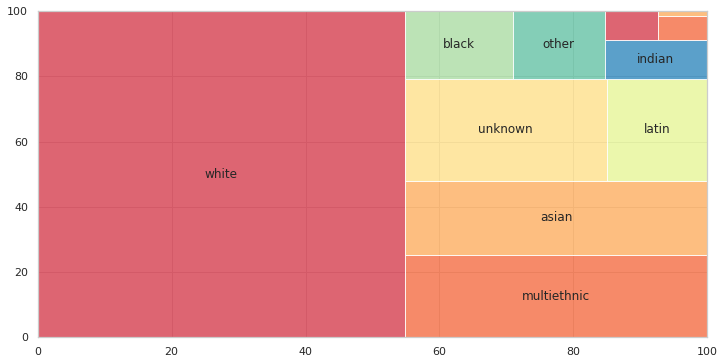

In [38]:
import squarify
e.values
e.index
a,fig =plt.subplots(figsize=(12,6)) 
c= ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd' ]
squarify.plot(sizes= e.values, label = e.index[:8], alpha = 0.8, color=c)
plt.show()

**Checking the Status data**

In [52]:
users.status.value_counts()

single            55570
seeing someone     2058
available          1861
married             309
unknown              10
Name: status, dtype: int64

**Cleaning Job Data**

In [53]:
users.job.value_counts()

other                                7572
student                              4865
science / tech / engineering         4842
computer / hardware / software       4697
artistic / musical / writer          4428
sales / marketing / biz dev          4389
medicine / health                    3678
education / academia                 3509
executive / management               2368
banking / financial / real estate    2264
entertainment / media                2240
law / legal services                 1379
hospitality / travel                 1362
construction / craftsmanship         1019
clerical / administrative             805
political / government                705
rather not say                        432
transportation                        365
unemployed                            272
retired                               249
military                              200
Name: job, dtype: int64

In [54]:

users['job_clean'] = users.job.str.split(' /').str[0]
users.job_clean.value_counts()

other             7572
student           4865
science           4842
computer          4697
artistic          4428
sales             4389
medicine          3678
education         3509
executive         2368
banking           2264
entertainment     2240
law               1379
hospitality       1362
construction      1019
clerical           805
political          705
rather not say     432
transportation     365
unemployed         272
retired            249
military           200
Name: job_clean, dtype: int64

**Feature Selection, Data Balance, and Decision on Model**

- Filling the missing values
- Transforming the strings into codes

For predicticting the religion I have choosen following features from the data : **diet, drinks, etnicity, education, status, height, drugs, smokes, age, orientation**. These columns needs to be cleaned and ready to train the model


In [55]:
users.drinks.isnull().sum()

2964

In [56]:
#helpful features to predict religion orientation 
feat =['education_final', 'status', 'ethnicity_clean', 'diet_clean', 'drinks', 'job_clean', 'drugs', 'smokes','age','orientation', 'height', 'religion_clean']
df = users[feat].dropna(subset = ['religion_clean', 'job_clean', 'drugs', 'smokes', 'drinks'])
print(df.shape)
df.isna().sum()

(27929, 12)


education_final    0
status             0
ethnicity_clean    0
diet_clean         0
drinks             0
job_clean          0
drugs              0
smokes             0
age                0
orientation        0
height             0
religion_clean     0
dtype: int64

**Checking the class balance**

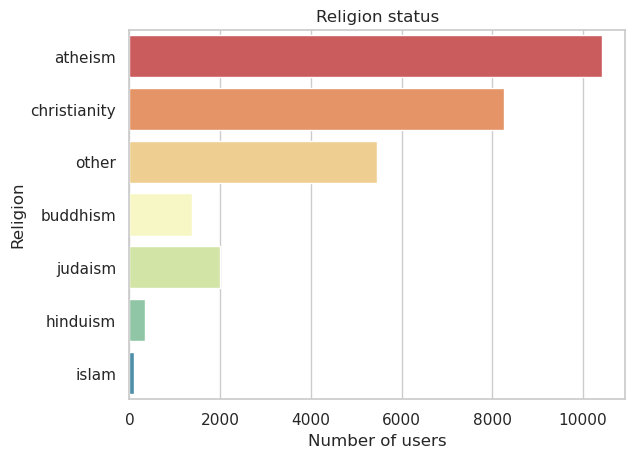

In [40]:
sns.countplot(data=df, y='religion_clean', palette='Spectral')
plt.ylabel('Religion')
plt.xlabel('Number of users')
plt.title('Religion status')
plt.show()



From the countplot it is evident that classes are are very unbalanced and means that model won't be able to see the whole picture. 
In the next steps I'll try building model with such data, and then will try to balance the classes and test different models again

**Last check if there are zero values**

In [57]:
df[df.isnull().any(axis=1)]

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean


## Import of Machine Learning Modules ##

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

## Is it possible to predict if person is religious or not? ##
Before trying to predict the religion of user, we could first try to predict if person is religious or not. To be able to predict that, religion_clean column will get besides its numerical representation another column stating  if person is religious or not 

In [58]:
def you_religious(x):
    if x=='atheism':
        return 0
    else:
      return 1
    
df['religious?'] = df.religion_clean.apply(you_religious) 



In [86]:
#to transform labels (religion_clean) we will use Label encoder , and rest we will transform wit pandas
#from sklearn.preprocessing import LabelEncoder 
labels = df['religious?']
features = df.drop(['religion_clean', 'religious?'], axis=1)
features = pd.get_dummies(features, drop_first=True)
features.head()


,age,height,education_final_high school,education_final_law school,education_final_masters program,education_final_med school,education_final_ph.d program,education_final_space camp,education_final_two-year college,education_final_unknown,...,job_clean_transportation,job_clean_unemployed,drugs_often,drugs_sometimes,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,orientation_gay,orientation_straight
0,22,75.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,35,70.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7,31,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,37,65.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11,28,72.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
labels.value_counts(normalize=True)

1    0.627233
0    0.372767
Name: religious?, dtype: float64

**Logistic Regression Model**

In [66]:
model_religious =LogisticRegression(max_iter= 5000)
religious_train, religious_test, labels_religious_train, labels_religious_test = train_test_split(features, labels, test_size = 0.2, random_state=1, stratify=labels)
model_religious.fit(religious_train, labels_religious_train)

#minmax_scaler_model =  preprocessing.MinMaxScaler()
#religious_train_mm = minmax_scaler_model.fit_transform(religious_train)
#religious_test_mm = minmax_scaler_model.transform(religious_test)
#model_religious.fit(religious_train_mm, labels_religious_train)

print('model test score: ', model_religious.score(religious_test, labels_religious_test))
print('model train score: ', model_religious.score(religious_train, labels_religious_train))

model test score:  0.6779448621553885
model train score:  0.6734100165599964


Since it only about answering if person is or isn't religious, and there is spectrum of 11 features, I was expecting better accuracy results.. But it is ok

What I found useful is parameter **stratify** . This tells train_test_split to make sure that the training and test datasets contain examples of each class in the same proportions as in the original dataset. This is especially import to do because of how imbalanced the classes are

**the model features and their corresponding coefficients** 

<Figure size 640x480 with 0 Axes>

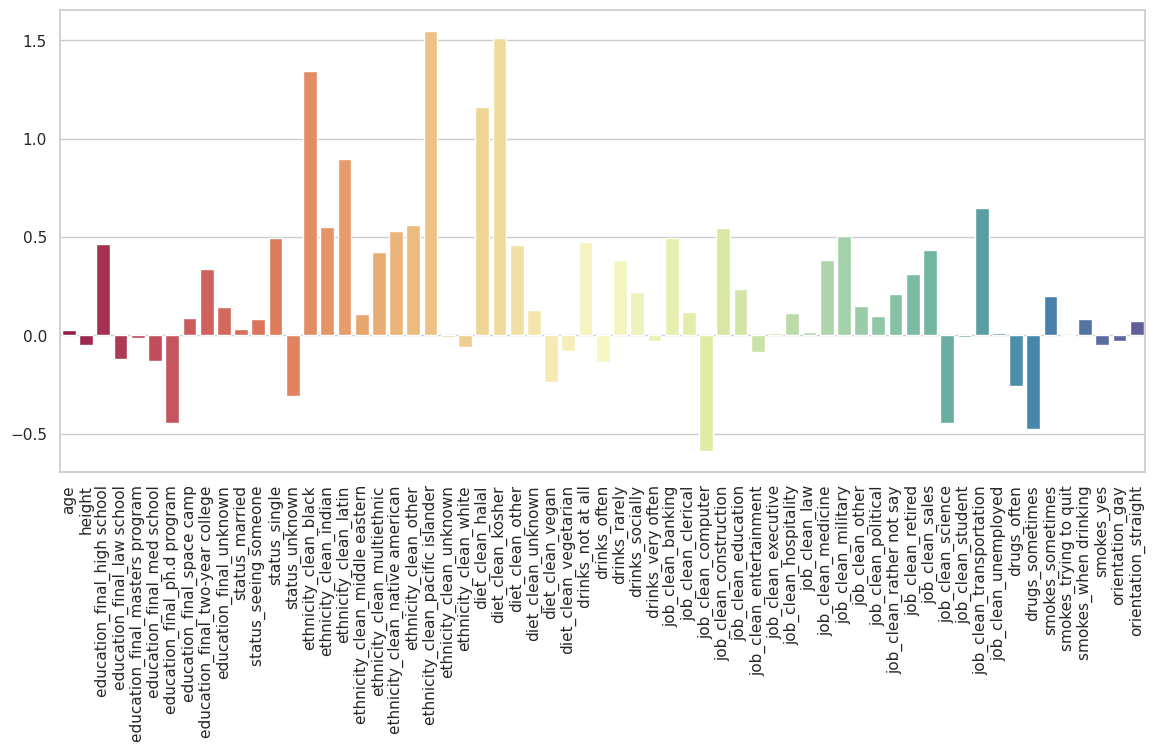

In [84]:
plt.clf()
religious_coef = (model_religious.coef_).tolist()[0]
feature_names = religious_train.columns
#labels=['education', 'ethnicity', 'drinking', 'status', 'diet','job', 'smoking', 'drugs', 'height', 'orientation', 'age']
ax, fig= plt.subplots(figsize= (14,6))
sns.barplot(x=feature_names,y=religious_coef, palette = 'Spectral' )
plt.xticks(rotation=90)

plt.show()

It seems like features related to education, ethnicity, and diet influence the model prediction at most 

In [78]:
y_pred = model_religious.predict(religious_test)
print(classification_report(labels_religious_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.38      0.47      2082
           1       0.70      0.85      0.77      3504

    accuracy                           0.68      5586
   macro avg       0.65      0.62      0.62      5586
weighted avg       0.67      0.68      0.66      5586



In [79]:
pd.crosstab(labels_religious_test, y_pred, colnames=['true labels'], rownames=['predictions'])

true labels,0,1
predictions,,
0,797,1285
1,514,2990


It is visible that model cannot distingush properly if person is religious or not, especially high are false positives where lot of cases is classified as religious although they are not .

**Try Different Algorithms.... Random Forest Classifier for binary classification**

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
forest = RandomForestClassifier(random_state = 1)
fx_train, fx_test, fy_train, fy_test = train_test_split(features, labels, random_state=1, stratify=labels)
forest.fit(fx_train, fy_train)

RandomForestClassifier(random_state=1)

In [93]:
print(forest.score(fx_test, fy_test)) 
from sklearn.metrics import classification_report
y_predict = forest.predict(fx_test)
forest_classification= classification_report(fy_test, y_predict)
print(forest_classification)

0.6395532006301017
              precision    recall  f1-score   support

           0       0.52      0.41      0.46      2603
           1       0.69      0.78      0.73      4380

    accuracy                           0.64      6983
   macro avg       0.60      0.59      0.59      6983
weighted avg       0.63      0.64      0.63      6983



In [94]:
pd.crosstab(fy_test, y_predict, colnames=['true labels'], rownames=['predictions'])

true labels,0,1
predictions,,
0,1069,1534
1,983,3397


## Can Model do a user religion classification based on available data? ## 

In [95]:
df_class= df.drop('religious?', axis=1)
df_class.head()

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean
0,college/university,single,multiethnic,anything,socially,transportation,never,sometimes,22,straight,75.0,atheism
1,space camp,single,white,other,often,hospitality,sometimes,no,35,straight,70.0,atheism
7,college/university,single,white,anything,socially,artistic,never,no,31,straight,65.0,christianity
9,two-year college,single,white,anything,not at all,student,never,no,37,straight,65.0,atheism
11,college/university,seeing someone,white,anything,socially,banking,never,no,28,straight,72.0,christianity


In [ ]:
df_class= df.drop('religious?', axis=1)
df_class.head()

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean
0,college/university,single,multiethnic,anything,socially,transportation,never,sometimes,22,straight,75.0,atheism
1,space camp,single,white,other,often,hospitality,sometimes,no,35,straight,70.0,atheism
7,college/university,single,white,anything,socially,artistic,never,no,31,straight,65.0,christianity
9,two-year college,single,white,anything,not at all,student,never,no,37,straight,65.0,atheism
11,college/university,seeing someone,white,anything,socially,banking,never,no,28,straight,72.0,christianity


In [ ]:
df_class= df.drop('religious?', axis=1)
df_class.head()

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean
0,college/university,single,multiethnic,anything,socially,transportation,never,sometimes,22,straight,75.0,atheism
1,space camp,single,white,other,often,hospitality,sometimes,no,35,straight,70.0,atheism
7,college/university,single,white,anything,socially,artistic,never,no,31,straight,65.0,christianity
9,two-year college,single,white,anything,not at all,student,never,no,37,straight,65.0,atheism
11,college/university,seeing someone,white,anything,socially,banking,never,no,28,straight,72.0,christianity


In [ ]:
df_class= df.drop('religious?', axis=1)
df_class.head()

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean
0,college/university,single,multiethnic,anything,socially,transportation,never,sometimes,22,straight,75.0,atheism
1,space camp,single,white,other,often,hospitality,sometimes,no,35,straight,70.0,atheism
7,college/university,single,white,anything,socially,artistic,never,no,31,straight,65.0,christianity
9,two-year college,single,white,anything,not at all,student,never,no,37,straight,65.0,atheism
11,college/university,seeing someone,white,anything,socially,banking,never,no,28,straight,72.0,christianity


In [ ]:
df_class= df.drop('religious?', axis=1)
df_class.head()

,education_final,status,ethnicity_clean,diet_clean,drinks,job_clean,drugs,smokes,age,orientation,height,religion_clean
0,college/university,single,multiethnic,anything,socially,transportation,never,sometimes,22,straight,75.0,atheism
1,space camp,single,white,other,often,hospitality,sometimes,no,35,straight,70.0,atheism
7,college/university,single,white,anything,socially,artistic,never,no,31,straight,65.0,christianity
9,two-year college,single,white,anything,not at all,student,never,no,37,straight,65.0,atheism
11,college/university,seeing someone,white,anything,socially,banking,never,no,28,straight,72.0,christianity


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_class = df_class['religion_clean']
features_class = df_class.drop('religion_clean', axis=1)
labels_class =le.fit_transform(labels_class)
feature_class = pd.get_dummies(features_class)


In [106]:
x_train_class, x_test_class, y_train_class, y_test_class=train_test_split(feature_class, labels_class, test_size=0.2, random_state=4)


In [108]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
x_train_over, y_train_over = over.fit_resample(x_train_class, y_train_class) 

In [113]:
values, counts = np.unique(y_train_over, return_counts=True) #it is balanced 
print(values, counts)

[0 1 2 3 4 5 6] [8348 8348 8348 8348 8348 8348 8348]


In [114]:
over_rfc = RandomForestClassifier()
over_rfc.fit(x_train_over, y_train_over)
over_score = over_rfc.score(x_test_class, y_test_class)

In [115]:
over_score

0.41693519513068383

In [116]:
y_pred_over = over_rfc.predict(x_test_class)
print(classification_report(y_test_class, y_pred_over))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      2063
           1       0.12      0.07      0.09       289
           2       0.48      0.50      0.49      1664
           3       0.35      0.48      0.41        64
           4       0.38      0.19      0.25        16
           5       0.19      0.13      0.15       444
           6       0.28      0.27      0.28      1046

    accuracy                           0.42      5586
   macro avg       0.33      0.31      0.31      5586
weighted avg       0.40      0.42      0.41      5586



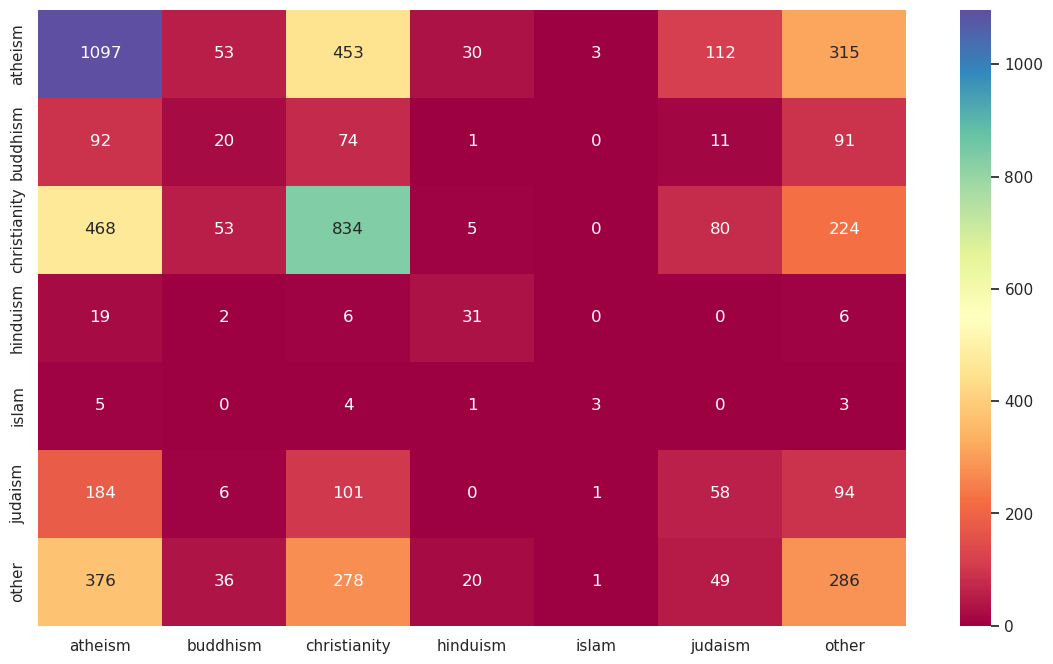

In [129]:
from sklearn.metrics import confusion_matrix
plt.subplots(figsize=(14,8))
cf=confusion_matrix(y_test_class, y_pred_over)
sns.heatmap(cf, annot=True, cmap='Spectral', xticklabels=le.classes_, yticklabels=le.classes_, fmt='g')
plt.show()

Model struggles to distinguish christian users and those classified as others, or atheists. it might worth trying to remove 'others' as class and then try to train again.

In [131]:
lg=LogisticRegression(max_iter=6000)
lg.fit(x_train_over, y_train_over)
lg_score = lg.score(x_test_class, y_test_class)
y_pred_lg = lg.predict(x_test_class)
print(classification_report(y_test_class, y_pred_lg))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57      2063
           1       0.14      0.04      0.06       289
           2       0.51      0.56      0.53      1664
           3       0.41      0.64      0.50        64
           4       0.33      0.19      0.24        16
           5       0.27      0.12      0.17       444
           6       0.37      0.22      0.28      1046

    accuracy                           0.47      5586
   macro avg       0.36      0.35      0.34      5586
weighted avg       0.44      0.47      0.44      5586



None of the alghorithms manage to provide successuful results, above the 50% of accuracy. As we see in confusion matrices some religion classes cannot be correctly distinguished. 

In [132]:
pd.crosstab(y_test_class, y_pred_lg)

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
0,1373,24,419,34,3,54,156
1,129,11,72,0,1,7,69
2,544,25,932,4,1,44,114
3,16,2,1,41,0,0,4
4,4,0,4,2,3,0,3
5,235,0,102,0,1,53,53
6,449,15,292,20,0,37,233


## Next Steps ##

 the next step would be: 
- Analysing of Essay texts and based on that predict & Classify the religion 
- removing other from the classes and try to train again